In [1]:
# TensorFlow and tf.keras
import os
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.10.0
Num GPUs Available:  1


In [2]:
# 1. Load Fashion MNIST Dataset and Preprocess Data
fashion_mnist = keras.datasets.fashion_mnist
(train_val_images, train_val_labels), (test_images, test_labels) = fashion_mnist.load_data()
# define a split for our validation data. 50000 means we want 50000 training and 10000 validation
split = 50000

# split the data we got between the training and validation arrays
train_images, train_labels = train_val_images[:split], train_val_labels[:split]
val_images, val_labels = train_val_images[split:], train_val_labels[split:]

# print the shapes of validation and training datasets
print(train_images.shape, val_images.shape)

# data preprocessing to normalize data
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# reshape data to fit our input shape for the network
train_images = train_images[..., np.newaxis]
val_images = val_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

print(train_images.shape)

(50000, 28, 28) (10000, 28, 28)
(50000, 28, 28, 1)


In [4]:
# 2. Build, Train, and Evaluate
# set up the model according to the paramters listed above
model = keras.Sequential([
    # apply 4 filters with the input shape the we reshaped to earlier
    keras.layers.Conv2D(4, input_shape=(28,28,1), kernel_size=(5,5), strides=1, padding='same', activation='relu'),
    # simply follow the table of parameters provided earlier for the rest of the layers
    keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(8, input_shape=(14,14,4), kernel_size=(3,3), strides=1, padding='valid', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# compile the model and test for accuracy
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# 3. Saving the model
callbacks = [
  keras.callbacks.ModelCheckpoint(
      filepath="my_model.keras",
      monitor="val_loss"
  )
]

# train the model using the training images and validation
history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10)
#print('\nTest accuracy:', test_acc)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-05-01 20:30:20.507856: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-01 20:30:20.508500: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2023-05-01 20:30:21.295316: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/opt/homebrew/Caskroom/miniconda/base/envs/ece479_tf/lib/python3.10/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-05-01 20:30:21.613330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.5542 - accuracy: 0.7982

2023-05-01 20:30:37.138965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 17s 9ms/step - loss: 0.5542 - accuracy: 0.7982 - val_loss: 0.4106 - val_accuracy: 0.8482
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3807 - accuracy: 0.8610 - val_loss: 0.3573 - val_accuracy: 0.8696
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3267 - accuracy: 0.8791 - val_loss: 0.3357 - val_accuracy: 0.8758
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2957 - accuracy: 0.8897 - val_loss: 0.3162 - val_accuracy: 0.8837
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2727 - accuracy: 0.8991 - val_loss: 0.3076 - val_accuracy: 0.8846
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2560 - accuracy: 0.9027 - val_loss: 0.2876 - val_accuracy: 0.8943
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2420 - accuracy: 0.9076 - val_loss: 0.2839 - val_accuracy: 0.8

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.2991 - accuracy: 0.8939


In [19]:
fnconv1_w, fnconv1_b = model.layers[0].get_weights()
fnconv2_w, fnconv2_b = model.layers[2].get_weights()
fc1_w, fc1_b = model.layers[5].get_weights()
fc2_w, fc2_b = model.layers[6].get_weights()
fc3_w, fc3_b = model.layers[7].get_weights()

print(model.layers[0].get_weights())

data_path = "../lab3_report/fashionnet/"
np.save(data_path + "fnconv1_w", fnconv1_w)
np.save(data_path + "fnconv2_w", fnconv2_w)
np.save(data_path + "fnconv1_b", fnconv1_b) 
np.save(data_path + "fnconv2_b", fnconv2_b)
np.save(data_path + "fc1_w", fc1_w)
np.save(data_path + "fc1_b", fc1_b)
np.save(data_path + "fc2_w", fc2_w)
np.save(data_path + "fc2_b", fc2_b)
np.save(data_path + "fc3_w", fc3_w)
np.save(data_path + "fc3_b", fc3_b)

[array([[[[-0.09144322, -0.13376571,  0.22949666, -0.993784  ]],

        [[ 0.19261709,  0.19732116,  0.12875177, -1.3540288 ]],

        [[ 0.31141096,  0.05608787, -0.20568024, -0.5878187 ]],

        [[ 0.1132305 ,  0.04344663, -0.08594748, -0.31529528]],

        [[ 0.05204757, -0.03281653,  0.00621008, -0.08750132]]],


       [[[ 0.12674591, -0.44544286,  0.12698188,  0.00778571]],

        [[ 0.17646028,  0.27868682,  0.08087449, -0.229663  ]],

        [[ 0.27583355,  0.19647497, -0.52092206, -0.10646437]],

        [[ 0.22990094, -0.16938126, -0.09302157, -0.20907375]],

        [[ 0.07576038,  0.04820706,  0.37868497,  0.1448569 ]]],


       [[[ 0.21903731,  0.03250712, -0.17995602, -0.31749785]],

        [[ 0.27645436,  0.02286113, -0.10477076, -0.30369085]],

        [[ 0.3827527 , -0.04234163, -0.23880509,  0.5163373 ]],

        [[-0.24144153,  0.15408109, -0.03800508,  0.27658835]],

        [[-0.08398516,  0.37492508,  0.544196  ,  0.01989415]]],


       [[[ 0.26693

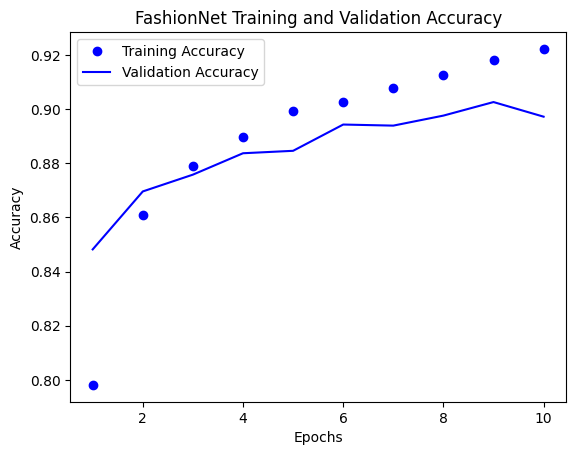

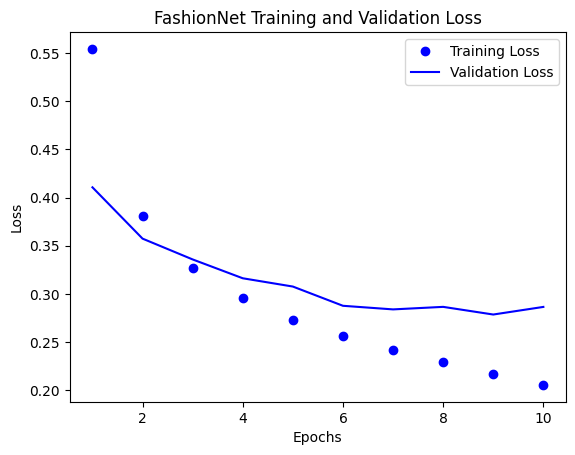

In [26]:
# plot training and validation accuracy and loss
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, "bo", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
plt.title("FashionNet Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("graph1.png")
plt.figure()
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("FashionNet Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig("graph2.png")
plt.show()
